In [1]:
from accountmanager.Porfolio import Porfolio
from datadownloader.DataHandler import DataHandler
from datetime import datetime
import matplotlib.pyplot as plt

# Prepare required data:

In [2]:
handler = DataHandler()
handler.prepare_data(data_type='stock', codes=['AAPL', 'MSFT'], 
                     columns=['Open','High','Low','Close','Volume'], price_column='Adj Close', 
                     freq='daily')

In [28]:
current_date = datetime(2005, 1, 3)
handler.get_updated_data(current_date, nrows=5)

{'AAPL':              Open   High    Low  Close      Volume   Price
 2004-12-28  63.30  64.25  62.05  64.18  10924200.0  3.9683
 2004-12-29  63.80  64.98  63.57  64.44   8027900.0  3.9844
 2004-12-30  64.81  65.03  64.22  64.80   6166800.0  4.0066
 2004-12-31  64.89  65.00  64.03  64.40   4974800.0  3.9819
 2005-01-03  64.78  65.11  62.60  63.29  12357000.0  3.9133,
 'MSFT':              Open   High     Low  Close      Volume    Price
 2004-12-28  26.84  27.03  26.800  26.95  55075900.0  19.4507
 2004-12-29  26.85  27.00  26.820  26.90  47594900.0  19.4146
 2004-12-30  26.89  26.94  26.749  26.76  48355400.0  19.3135
 2004-12-31  26.75  26.90  26.679  26.72  54959500.0  19.2847
 2005-01-03  26.80  26.95  26.649  26.74  65002900.0  19.2991}

# Strategy:

In [36]:
porfolio = Porfolio(starting_capital=10000)

date = datetime(2005, 1, 3)
current_data = handler.get_updated_data(date, nrows=1)
porfolio.update_trading_history(date, 'AAPL', 400, current_data['AAPL']['Price']) # Buy 400 AAPL
porfolio.update_trading_history(date, 'MSFT', 400, current_data['MSFT']['Price']) # Buy 400 MSFT

for i in range(15*12):
    current_data = handler.get_updated_data(date, nrows=1)    
    porfolio.update_value_history(date, current_data)
    date = handler.get_next_trading_date(date, n=21)

# Porfolio performance:

In [40]:
porfolio_perf = porfolio.get_porfolio_performance(N=12)
porfolio_perf

{'Value History': Date
 2005-01-03     10000.00
 2005-02-02     10323.28
 2005-03-04     10121.40
 2005-04-05      9873.24
 2005-05-04      9853.04
                 ...    
 2019-08-09    134880.84
 2019-09-10    140655.28
 2019-10-09    145610.72
 2019-11-07    161159.64
 2019-12-09    167160.04
 Name: Value, Length: 180, dtype: float64,
 'Rate of Return History ': Date
 2005-01-03         NaN
 2005-02-02    0.032328
 2005-03-04   -0.019556
 2005-04-05   -0.024518
 2005-05-04   -0.002046
                 ...   
 2019-08-09   -0.001988
 2019-09-10    0.042811
 2019-10-09    0.035231
 2019-11-07    0.106784
 2019-12-09    0.037233
 Name: Value, Length: 180, dtype: float64,
 'Current Value': 167160.04,
 'Total Growth': 15.716004000000002,
 'Annualized Rate of Return': 4.537630688547022,
 'Sharpe Ratio': 4.287093465875746,
 'Drawdowns':                    TS       Peak  Drawdown  Drawdown %  Duration
 Date                                                            
 2005-01-03   10000.00 

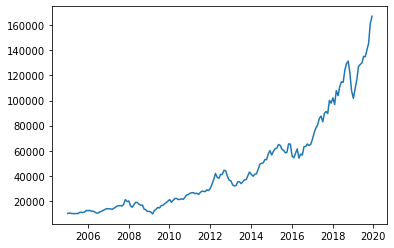

In [42]:
plt.plot(porfolio_perf['Value History'])
plt.show()

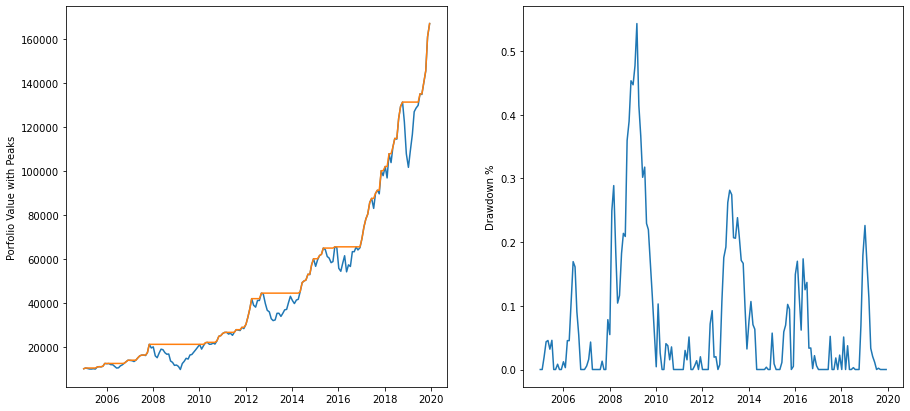

In [48]:
fig, axes = plt.subplots(1,2,figsize=(15, 7))

axes[0].plot(porfolio_perf['Drawdowns']['TS'])
axes[0].plot(porfolio_perf['Drawdowns']['Peak'])
axes[0].set_ylabel('Porfolio Value with Peaks')

axes[1].plot(porfolio_perf['Drawdowns']['Drawdown %'])
axes[1].set_ylabel('Drawdown %')

plt.show()